## Simulation und Modellierung WS16/17 - Uebung 05

### Aufgabe 1 : verallgemeinerte Fibonacci Zahlen

Schreiben Sie eine Funktion `AllgFib(F0=1,F1=1,a=1,b=1,N=3)`, welche die ersten `N` Folgeglieder der verallgemeinerten Fibonaccifolge

$$
    F_{n+1} = a F_n + b F_{n-1}
$$

mit den Anfangsbedingungen $F_0=$ `F0` und $F_1=$ `F1` berechnet und als Liste ausgibt. (Achtung : Die Definition in der Vorlesung war etwas anders)

Schreiben Sie eine Funktion `my_sqrt(x)`, welche mit Hilfe der verallgemeinerten Fibonacci Zahlen die Wurzel aus `x` bis auf Maschinengenauigkeit ausrechnet. Berechnen Sie $\sqrt{2}$ mit dieser Funktion. 

*Hinweis :* Iterieren Sie die Fibonacci Folge schrittweise bis sich das Verhaeltnis aufeinanderfolgender Zahlen nicht mehr aendert.

In [6]:
from pylab import * # Zunächst importiere ich alles aus pylab um später die sqrt-Funktion zum Vergleich hab

In [3]:
# Die folgende Funktion AllgFib gibt, abhängig von den Startwerten der allgemeinen Fibonacci-Folge F0 und F1 sowie den
# beiden Koeffizienten a und b mit denen das jewails nächste Element anhand der obrigen Formel berechnet wird, eine
# Liste der ersten N Zahlen einer allgemeinen Fibonacci-Folge aus.
# F0, F1, a und b sind 

def AllgFib(F0=1,F1=1,a=1,b=1,N=3):          # hier definiere ich die Funktion AllgFib mit den Schlüsselargumenten 
                                             # F0 = 1, Fn = 1, a = 1,  b = 1 und N = 3. Somit sind diese Vaiablen 
                                             # standardmäßig definiert. F0 ist dabei das erste Element der allgemeinen
                                             # Fibonacci-Folge und F1 das zweite. a und b sind die Koeffizienten,
                                             # nach denen das F_n+1 Element der Fibonacci-Folge bestimmt wird.
    
    Fn = []                                  # Hier definiere ich die Liste, in der die Fibonacci-Zahlen gespeichert 
                                             # werden sollen.
        
    for n in range(0,N):                     # n nimmt der Reihe nach alle Werte von 0 bis ausschließlich N an
        if n == 0:                             # Wenn n == 0 ist, soll das nullte (erste) Element der Fibonacci Folge
            Fn.append(F0)                      # hinzugefügt werden (append-Befehl). Dieses ist per Definition F0
        elif n == 1:                           # Wenn n == 1 ist, soll das erste (zweite) Element der Fibonacci Folge
            Fn.append(F1)                      # hinzugefügt werden (append-Befehl). Dieses ist per Definition F1
        else:                                  # Für alle Werte größer als n sollen die Fibonacci Zahlen anhand der
                                               # obrigen Formel berechnet werden.
            Fn.append((a*Fn[-1]+b*Fn[-2]))     # Die Zahl die hinzugefügt wird (append-Befehl) ist a-mal das momentan
                                               # letzte Element der Liste plus b-mal das zurzeit vorletzte Element der 
                                               # Liste der Fibonacci Zahlen.
                    
    return Fn                                # nachdem die for-Schleife erfolgreich durchgeführt wurde wird die Liste
                                             # der Fibonacci Zahlen Fn ausgegeben

In [11]:
# Die folgende Funktion my_sqrt berechnet die Quadratwurzel einer gegebenen Zahl x, näherungsweise anhand 
# der allgemeinen Fibonacci-Folge. Dabei wird schrittweise die Anzahl der Zahlen der Fibonacci-Folge, die 
# der Computer generiert, erhöht um ein möglichst genaues Ergebnis zu liefern. Dabei wird solange iteriert 
# bis sich das Verhältnis aufeinanderfolgender Fibonacci Zahlen nicht mehr ändert. 

def my_sqrt(x):
    n = 3                 # zunächst lege ich den Startwert auf drei fest, da wir zum Vergleich aufeinanderfolgener
                          # Quotienten mindestens 3 Fibonacci Zahlen brauchen, die wir vergleichen können
    Maschienengenauigkeit = 1*10**(-16)  # Hier lege ich die Maschienengenauigkeit auf 10^-16 fest (siehe Vorlesung)
    diff = (AllgFib(a=2,b=x-1,N=n)[-1]/AllgFib(a=2,b=x-1,N=n)[-2])-(AllgFib(a=2,b=x-1,N=n)[-2]/AllgFib(a=2,b=x-1,N=n)[-3])
    # In der Variable diff wird die Differenz der Quotienten aufeinanderfolgenden allgemeinen Fibonacci Zahlen gespeichert.
    # Es werden dabei immer die letzten drei allgemeinen Fibonacci Zahlen benutzt. Die Variablen a und b werden dabei ganz
    # bestimmt gewählt: a = 2 und b = x - 1. Dies folgt aus dem Zusammenhang des Quotienten von zwei 
    # aufeinanderfolgenden Fibbonachi Zahlen mit der Quadratwurzel.
    # Es gilt: (F_n+1)/(F_n) = (a/2) + sqrt((a/2)^2 + b). Wählt man nun a = 2 gilt:
    # (F_n+1)/(F_n) = 1 + sqrt( 1 + b ). Mit b = x -1 also: (F_n+1)/(F_n) - 1 = sqrt( x ).
    # Damit dieser Zusammenhang auch stimmt müssen wir n sehr groß wählen. So groß, dass der Computer keinen
    # Unterscheid mehr feststellen kann.
    
    while abs(diff)>Maschienengenauigkeit:    # Solange der Betrag von diff größer als die Maschinenungenauigkeit ist,
        n = n + 1                             # soll die Zahl generierter Fibonacchi Zahlen schrittweise um 1 erhöht 
                                              # werden. Danach soll die Differenz diff mit dem neuen n erneut berechnet
                                              # werden.
        diff = (AllgFib(a=2,b=x-1,N=n)[-1]/AllgFib(a=2,b=x-1,N=n)[-2])-(AllgFib(a=2,b=x-1,N=n)[-2]/AllgFib(a=2,b=x-1,N=n)[-3])
    
    # Wenn wir unser n bestimmt haben, können wir unsere Wurzel mit dem oben beschriebenen Zusammenhang errechnen
    # (F_n+1)/(F_n) - 1 = sqrt( x ) für sehr große n
    wurzel = (AllgFib(F0=1,F1=1,a=2,b=x-1,N=n)[-1]/AllgFib(F0=1,F1=1,a=2,b=x-1,N=n)[-2])-1  # berechnet die Wurzel
    return wurzel                                                                           # gibt die Wurzel aus

In [12]:
##### Example 1 #####
print("Example 1")
print(AllgFib(N=3))

##### Example 2 #####
print("Example 2")
print(AllgFib(N=100))

##### Example 3 #####
print("Example 3")
print(my_sqrt(2))
print(sqrt(2))

##### Example 4 #####
print("Example 4")
print(my_sqrt(13))
print(sqrt(13))

##### Example 5 #####
print("Example 5")
print(my_sqrt(100))
print(sqrt(100))

Example 1
[1, 1, 2]
Example 2
[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025, 20365011074, 32951280099, 53316291173, 86267571272, 139583862445, 225851433717, 365435296162, 591286729879, 956722026041, 1548008755920, 2504730781961, 4052739537881, 6557470319842, 10610209857723, 17167680177565, 27777890035288, 44945570212853, 72723460248141, 117669030460994, 190392490709135, 308061521170129, 498454011879264, 806515533049393, 1304969544928657, 2111485077978050, 3416454622906707, 5527939700884757, 8944394323791464, 14472334024676221, 23416728348467685, 37889062373143906, 61305790721611591, 99194853094755497, 160500643816367088, 259695496911122585, 420196140727489673, 67

### Aufgabe 2 : Collatz-Problem

Wir betrachten die folgende Abbildung ueber den *positiven* natuerlichen Zahlen

$$
    f(n) = \left\lbrace \begin{array}{ll}
                            {}n/2 \qquad &,\textrm{falls }n\textrm{ gerade} \\
                            3n+1\qquad &,\textrm{falls }n\textrm{ ungerade}
                        \end{array}
           \right.
$$

sowie die natuerliche Zahl $\tau(n)$ welche angibt, wie of $f$ iteriert werden muss, bis man die Zahl 1 erreicht, d.h.

$$
    \left(f\circ\right)^{\tau(n)}(n) = 1
$$

Schreiben Sie eine Funktion `tau(n)`, welche diese Zahl berechnet. Berechnen Sie eine Liste `L` der Werte $\tau(n)$ fuer die ersten `2**20` positiven natuerlichen Zahlen und plotten diese mit

```python
    from pylab import *
    plot(L,'.') # nur Punkte setzen, ohne diese zu verbinden
    show()
```

<a href="https://en.wikipedia.org/wiki/Collatz_conjecture">Collatz-Problem @ Wikipedia</a><br>
Collatz-Problem @ xkcd : <img src="http://imgs.xkcd.com/comics/collatz_conjecture.png">

In [47]:
# Die folgende Funktion nimmt eine Zahl n und gibt eine Zahl tau aus, wie oft die Regeln des Collatz-Problems
# auf diese Zahl angwendet werden, bis sich der Wert 1 einstellt. Dabei kann man sich mit p=true auch den 
# kompletten Weg bis zur 1 ausgeben lassen.

def tau(n,p=False):
    tau = 0                # Der Startwert für tau ist 1, da jede natürliche Zahl, die wir wählen können mindestens 0
                           # Schritte durchlaufen muss (Bsp: 1 braucht exact 0 Schritte)
    while n != 1:          # Solange unsere Zahl nicht Null ist, wollen wir weiter die Regeln des Collatz-Problems anwenden 
        if n%2==0:           # wenn n gerade ist, soll folgendes getan werden:
            n = n/2            # n wird durch zwei geteilt (Regel 1)
            tau = tau + 1      # Da wir nun eine der Regeln genutzt habe, muss tau um 1 größer werden
            if p==True:        # falls p=true soll diese neue Zahl auch ausgegeben werden, dies ist aber optional
                print(n)
        else:                # wenn n nicht gerade (also ungerade) ist, soll folgendes getan werden:
            n = 3*n + 1      # n soll mit 3 multipliziert werden und dann soll 1 addiert werden (Regel 2)
            tau = tau + 1    # Da wir nun eine der Regeln genutzt habe, muss tau um 1 größer werden
            if p==True:      # falls p=true soll diese neue Zahl auch ausgegeben werden, dies ist aber optional
                print(n)
    return tau               # gibt tau aus

In [50]:
# Die folgende Funktion taulist erzeugt eine Liste der tau-Werte für die Zahlen 1 bis x.

def taulist(x):
    T = [tau(n) for n in range(1,x+1)]  # erstellt eine List T comprehension die mit den  tau-Werten von 1 bis x
    return T                            # gibt die Liste T aus

In [54]:
### Beispiel 1 ###
print("Beispiel 1")
print(tau(9))
print("Beispiel 1 mit option P")
print(tau(9, p=True))

### Beispiel 2 ###
print("Beispiel 2")
print(taulist(10))
print(taulist(50))

Beispiel 1
19
Beispiel 1 mit option P
28
14.0
7.0
22.0
11.0
34.0
17.0
52.0
26.0
13.0
40.0
20.0
10.0
5.0
16.0
8.0
4.0
2.0
1.0
19
Beispiel 2
[0, 1, 7, 2, 5, 8, 16, 3, 19, 6]
[0, 1, 7, 2, 5, 8, 16, 3, 19, 6, 14, 9, 9, 17, 17, 4, 12, 20, 20, 7, 7, 15, 15, 10, 23, 10, 111, 18, 18, 18, 106, 5, 26, 13, 13, 21, 21, 21, 34, 8, 109, 8, 29, 16, 16, 16, 104, 11, 24, 24]


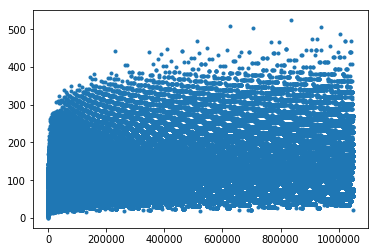

In [51]:
L = taulist(2**20)  # erstellt Liste L mit den tau-Werten für die Zahlen 1 bis 2^20 
plot(L,'.') # nur Punkte setzen, ohne diese zu verbinden
show()      # zeigt die Punkte

### Zusatzaufgabe (+10%):

- Wie lautet die Taylorentwicklung von $f(x) = \sqrt{1+x}$ ?
- Schreiben Sie eine Funktion `sqrt1px(x,eps=0)`, welche die Taylorreihe bis auf eine gegebene Genauigkeit $\varepsilon$, bzw. bis zur Konvergenz $\varepsilon=0$ berechnet.
- berechnen Sie $\sqrt{2}$ als `sqrt1px(1.0)` bzw. `1.0/sqrt1px(-0.5)`.

### Wie lautet die Taylor-Entwicklung von $f(x) = \sqrt{1+x}$ ?


Bei der Taylor-Entwicklung handelt es sich um ein Verfahren, bei dem versucht wird, eine glatte Funktion in der Umgebung einer Stelle durch eine Reihe von Polynomen, die sogenannten Taylor-Polynome, näherungsweise darzustellen. Die Reihe ist der Grenzwert der Taylor-Polynome und man nennt diese Reihenentwicklung Taylor-Entwicklung. Es gilt:

Sei ${ I\subset \mathbb {R} }$  ein offenes Intervall, ${f\colon I\rightarrow \mathbb {R} }$ eine glatte Funktion und $ a $ ein Element von $ I $. Dann heißt die unendliche Reihe

$$  T f (x;a) = \sum_{n=0}^{\infty} \frac {f^{(n)} (a)}{n!} (x-a)^n = f(a) + f'(a)(x-a) + \frac{f''(a)}{2}(x-a)^2 + \frac{f'''(a)}{6}(x-a)^3 + \ldots $$

die Taylorreihe von $f$ mit Entwicklungsstelle $a$. Hierbei bezeichnet $n!$ die Fakultät von $n$ und  $f^{(n)}$ die $n$-te Ableitung von $f$, wobei man $f^{(0)} := f$ setzt.

Für $f(x) = \sqrt{1+x}$ an der Stelle $a$ also:

$$  T f (x;a) = \sum_{n=0}^{\infty} \frac {\sqrt{1+x}^{(n)} (a)}{n!} (x-a)^n = \sqrt{1+a} + (\sqrt{1+x})'(a) \cdot (x-a) + \frac{(\sqrt{1+x})''(a)}{2}(x-a)^2 + \frac{(\sqrt{1+x})'''(a)}{6}(x-a)^3 + \ldots $$

wobei die Ableitungen $f^{(n)}$:

$$ \sqrt{1+x}' = \frac{d}{dx}[\sqrt{1+x}] = \frac{1}{2} (x+1)^{\frac{1}{2}-1} \cdot \frac{d}{dx}[x+1] = \frac{\frac{d}{dx}[x] + \frac{d}{dx}[1]}{2 \sqrt{1+x}} = \frac{1+0}{2 \sqrt{1+x}} = \frac{1}{2 \sqrt{1+x}}$$

$$ \sqrt{1+x}'' = \frac{d^2}{dx^2}[\sqrt{1+x}] = \frac{d}{dx} \frac{1}{2 \sqrt{1+x}} = \frac{1}{2} \frac{d}{dx} \frac{1}{\sqrt{1+x}} = \frac{-(\frac{1}{2})(x+1)^{-\frac{1}{2} - 1} \cdot \frac{d}{dx}[x+1]}{2} = - \frac{\frac{d}{dx}[x] + \frac{d}{dx}[1]}{4 (1+x)^{\frac{3}{2}}} = - \frac{1 + 0}{4 (1+x)^{\frac{3}{2}}} = - \frac{1}{4 (1+x)^{\frac{3}{2}}} $$

$$ \sqrt{1+x}''' = \frac{d^3}{dx^3}[\sqrt{1+x}] = \frac{d}{dx} - \frac{1}{4 (1+x)^{\frac{3}{2}}} = - \frac{1}{4} \frac{d}{dx} \frac{1}{(1+x)^{\frac{3}{2}}} = - \frac{-(\frac{3}{2})(x+1)^{-\frac{3}{2} - 1} \cdot \frac{d}{dx}[x+1]}{2} = \frac{3(\frac{d}{dx}[x] + \frac{d}{dx}[1])}{8 (1+x)^{\frac{5}{2}}} = \frac{3(1 + 0)}{8 (1+x)^{\frac{5}{2}}} = \frac{3}{8 (1+x)^{\frac{5}{2}}}$$

$$ \vdots $$

Somit ist die Taylor-Entwicklung für $f(x) = \sqrt{1+x}$ an der Stelle $a$:

$$ T f (x;a) = \sum_{n=0}^{\infty} \frac {\sqrt{1+x}^{(n)} (a)}{n!} (x-a)^n = \sqrt{1+a} + \frac{1}{2 \sqrt{1+a}} \cdot (x-a) + - \frac{1}{8 (1+a)^{\frac{3}{2}}}(x-a)^2 + \frac{1}{16 (1+a)^{\frac{5}{2}}}(x-a)^3 + \ldots $$

Bsp: An der Stelle $a=0$:

$$ T f (x;0) = \sum_{n=0}^{\infty} \frac {\sqrt{1+x}^{(n)} (0)}{n!} (x-0)^n = 1 + \frac{x}{2} - \frac{x^2}{8} + \frac{x^3}{16} - \frac{5 x^4}{128} + \frac{7x^5}{256} + \ldots $$

In [13]:
from pylab import *  # importiert für die Wurzel
import math as mt    # importiert für Fakultäten

In [26]:
# Die folgende Funktion gibt die n-te Ableitung der Funktion sqrt(1+x) als Funktion an

def nAbleitungF(n):
    if n == 0:                  # Wenn n = 0 ist, soll das Ergebnis einfach nur die Funktion selbst sein
        def abl(j): 
            return sqrt(1+j)
    elif n == 1:                    # Die erste Ableitung soll (wie oben gezeigt) 1/(2*sqrt(1+x)) sein
        def abl(j): 
            return 1/(2*sqrt(1+j))
    elif n == 2:                        # Die zweite Ableitung soll (wie oben gezeigt) -1/(4*(1+x)^(3/2)) sein
        def abl(j):
            return -1/(4*(1+j)**(3/2))
    else:                                  # alle weiteren Ableitungen können nach einer ganz bestimmten Vorchrift gebildet
        def abl(j):                        # werden, diese lautet: (-1)**(n-1) * ((abs((1)-2*(n-1)))/(2**n * (1+j)**(abs((1/2)-n))))
            return (-1)**(n-1) * ((abs((1)-2*(n-1)))/(2**n * (1+j)**(abs((1/2)-n))))
        # es wäre zwar wahrscheinlich auch möglich gewesen den Fall n=1 und n=2 auch in der algemeinen Vorschrift
        # unter zu bringen, so war es jedoch für mich schneller und leichter
    return abl   # gibt die Ableitungsfunktion in abhängigkeit von der Variable j aus

In [45]:
# Diese Funktion soll die Taylor-Entwicklung (an 0) der Funktion f(x) = sqrt(1+x) an einer Stelle x mit der standard Genauigkeit 
# eps = 0 errechnen. Leider funktioniert sie aufgrund eines rekursions-Fehlers nicht und ich weiß nicht wie ich 
# den Fehler beheben kann, ohne andere zu schaffen.

def sqrt1px(x,eps=0):
    n = 0                     # start Wert für anzahl an Polynomen die verwendet werden sollen
    taypol = lambda a: 0      # taypol ist die Funktion die mal unser Taylor-Polynom werden soll
    for i in range(0,n+1):    
        abl = nAbleitungF(i)  # nach dem Verfahren das oben beschrieben wurde, sollen nun die n-Glieder des
                              # Taylor-Polynoms zusammengefügt werden.
        taypol = lambda a:  taypol(a) + (((abl(0))/(math.factorial(n)))(a-0)**i)  # hier geschiet der Fehler
                                                                                  # normale addition scheint zu unendlicher
                                                                                  # rekursion zu führen. Ich finde
                                                                                  # allerdings leider keine Methode, die
                                                                                  # diesen Fehler nicht hervorbringt.
    Vergleich = lambda c: sqrt(c+1) # hier wird die Vergleichsfunktion definiert
    diff = taypol(x) - Vergleich(x) # hier wird wie in Aufgabe 1 die Differenz an der Stelle x berechnet
                                    # um die beiden Werte zu vergleichen
    while abs(diff)>eps:            # solange die Differenz der Taylor-Entwicklung und der Orginalfunktion größer ist als 
                                    # epsilon, sollen neue Glieder an das Taylor-Polynom angehängt werden und die 
                                    # Differenz neu berechnet werden
        n = n + 1
        diff = taypol(x) - Vergleich(x)
    return taypol(x)                # gibt den Wert des taylor-Polynoms, angenähert an 0, an der Stelle x aus
        

In [46]:
print(sqrt1px(1.0))        # Sollten eigentlic sqrt(2) ausgeben
print( 1.0/sqrt1px(-0.5))  # geben allerdings leider nur einen Fehler

RecursionError: maximum recursion depth exceeded